In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\polynomial_dataset.csv")
df.head(3)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000


In [8]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


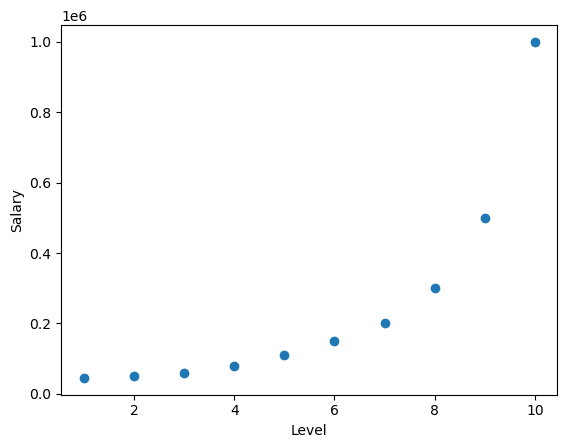

In [11]:
plt.scatter(df['Level'],df['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [13]:
x = df.iloc[:,:-1]
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [14]:
x.ndim

2

In [15]:
y = df['Salary']
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pf.transform(x)

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
lr.score(x_test,y_test)*100

99.45736852600353

In [42]:
# y = m1x1+m2x2^2+c

In [40]:
lr.coef_

array([ 5.61448661e-05, -2.82471547e-07,  4.56802723e+04, -1.72662521e+04,
        3.91992216e-10,  4.56802723e+04, -1.72662521e+04, -1.72662521e+04,
        8.36974250e+03, -1.09286045e+03,  0.00000000e+00,  4.56802723e+04,
       -1.72662521e+04, -1.72662521e+04,  8.36974250e+03, -1.09286045e+03,
        8.36974250e+03, -1.09286045e+03,  1.74551227e+02, -1.48809524e+00])

In [41]:
lr.intercept_

-27718.373549837153

In [36]:
pred = lr.predict(x)

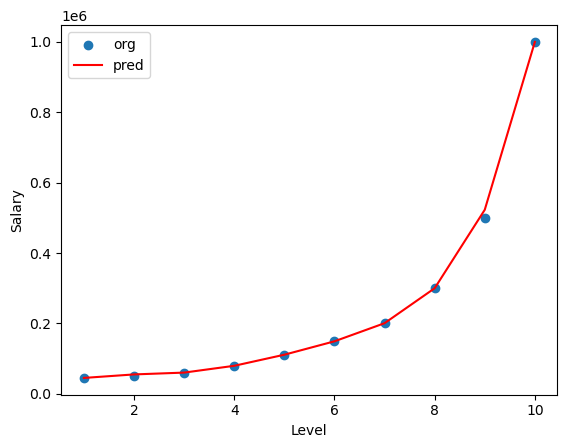

In [39]:
plt.scatter(df['Level'],df['Salary'])
plt.plot(df['Level'],pred,c = 'red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend(['org','pred'])
plt.show()

In [46]:
test = pf.transform([[4,4,3]])
test

array([[ 1.,  4.,  4.,  3., 16., 16., 12., 16., 12.,  9., 64., 64., 48.,
        64., 48., 36., 64., 48., 36., 27.]])

In [47]:
lr.predict(test)

array([2282806.16217538])